# Fake News detection project

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from wordcloud import WordCloud # type: ignore
from collections import Counter
# import nltk
from nltk.corpus import stopwords # type: ignore

warnings.filterwarnings("ignore")

#### Import data

ISOT Dataset

In [2]:
df_true = pd.read_csv("./data/True.csv", encoding="utf-8")
df_fake = pd.read_csv("./data/Fake.csv", encoding="utf-8")

df_true["label"] = "TRUE"
df_fake["label"] = "FAKE"

# combine both datasets into one
df = pd.concat([df_true, df_fake], ignore_index=True)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


#### Data Analysis

In [3]:
print(f"Dataset shape :{df.shape}")
print(f"There are {len(df.columns)} columns: {df.columns}")
print(df.info())
print(df.isnull().sum())
df.describe(include='all')

Dataset shape :(44898, 5)
There are 5 columns: Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB
None
title      0
text       0
subject    0
date       0
label      0
dtype: int64


,title,text,subject,date,label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",FAKE
freq,14,627,11272,182,23481


In [4]:
custom_palette = {
    'FAKE': 'indianred', # '#FF6347',
    'TRUE': 'lightgreen'# '#4CAF50'
}

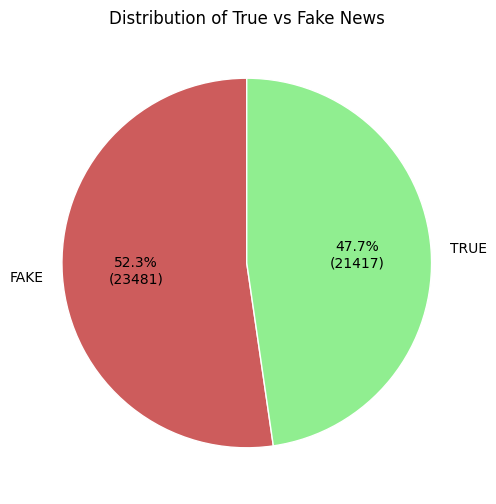

In [5]:
# Pie chart of True vs Fke counts
label_counts = df['label'].value_counts()

# formatting function for labels
def format_label(pct, allvals):
    absolute = int(pct / 100. * sum(allvals))
    return f"{pct:.1f}%\n({absolute})"

plt.figure(figsize=(6, 6))
colors = [custom_palette[label] for label in label_counts.index]
plt.pie(label_counts, labels=label_counts.index, startangle=90, wedgeprops={'edgecolor': 'white'},
        autopct=lambda pct: format_label(pct, label_counts), colors=colors)
plt.title("Distribution of True vs Fake News")
plt.show()

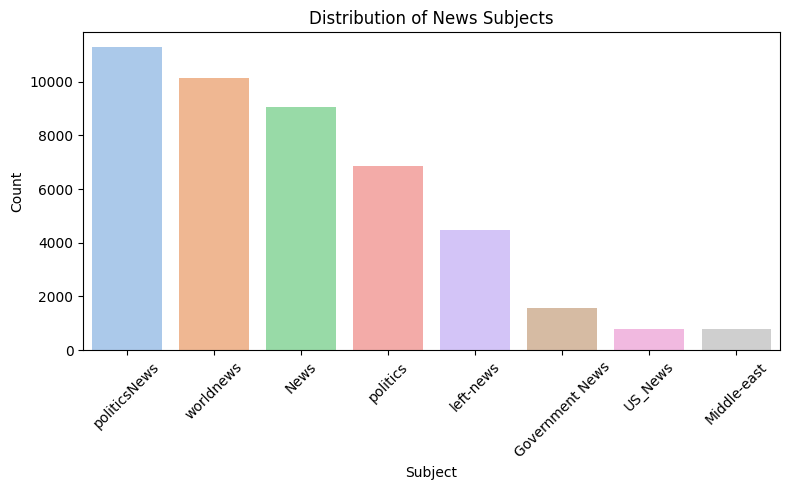

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [32]:
# Bar plot of the different subjects of articles
subject_counts = df['subject'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='pastel')
plt.title("Distribution of News Subjects")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df['subject'].value_counts()

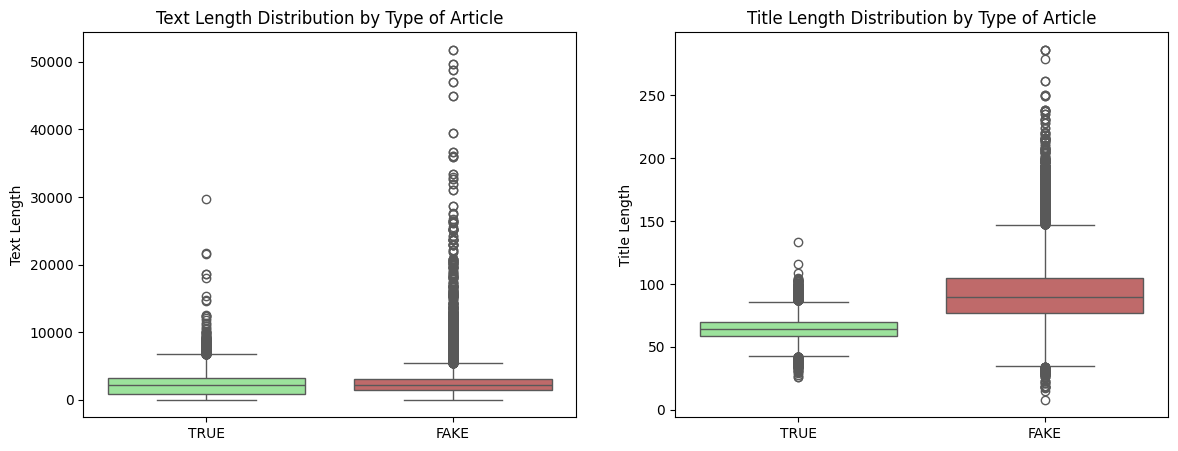

In [23]:
# Box plots for fake vs Truetext length and title length distributions

df['text_length'] = df['text'].apply(len)
df['title_length'] = df['title'].apply(len)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=df, x='label', y='text_length', palette=custom_palette, hue='label', ax=axes[0])
axes[0].set_title("Text Length Distribution by Type of Article")
axes[0].set_xlabel("")
axes[0].set_ylabel("Text Length")

sns.boxplot(data=df, x='label', y='title_length', palette=custom_palette, ax=axes[1])
axes[1].set_title("Title Length Distribution by Type of Article")
axes[1].set_ylabel("Title Length")
axes[1].set_xlabel("")

plt.show()

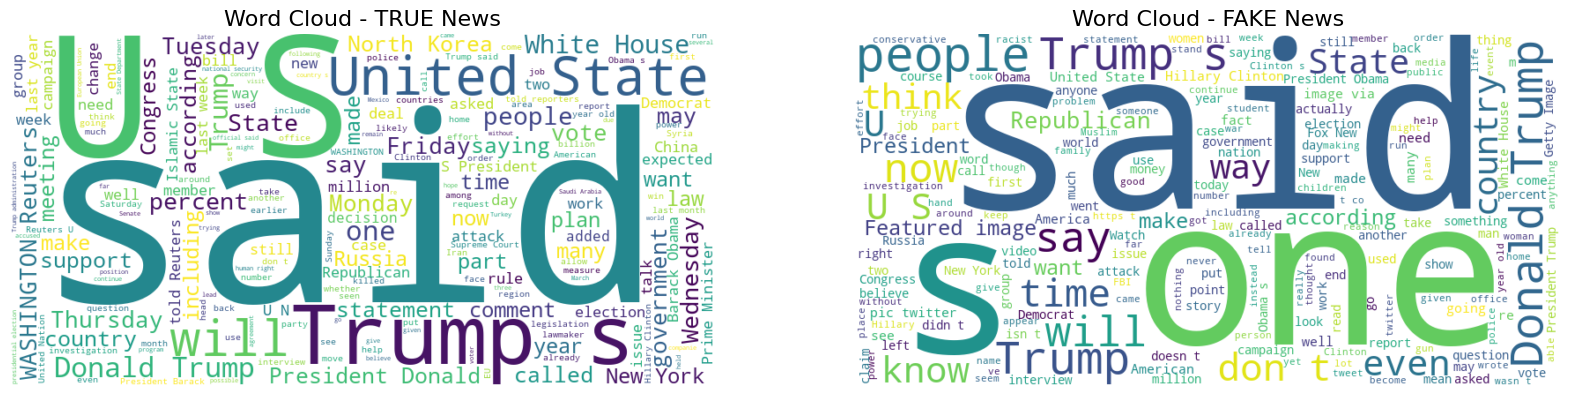

In [27]:
# Wordclouds for Fake vs True articles

# join all articles' texts for true and fake news :
true_text = ' '.join(df[df.label == 'TRUE']['text'])
fake_text = ' '.join(df[df.label == 'FAKE']['text'])

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
for ax, (text, title) in zip(axes, [(true_text, "TRUE News"), (fake_text, "FAKE News")]):
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud - {title}', fontsize=16)

# plt.tight_layout()
plt.show()

In [33]:
nltk.download('stopwords')
all_texts = ' '.join([true_text, fake_text])

# Normalize to lowercase and count word frequencies
words = [word.lower() for word in all_text.split()]
word_counts = Counter(words)

# Filter out common stopwords (in english)
stop_words = set(stopwords.words("english"))
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stop_words}

NameError: name 'stopwords' is not defined

In [25]:
import re

def get_top_n_words(corpus, n=None):
    words = re.findall(r'\b\w+\b', corpus.lower())
    return Counter(words).most_common(n)

print("Top 20 REAL words:")
print(get_top_n_words(true_text, 20))

print("\nTop 20 FAKE words:")
print(get_top_n_words(fake_text, 20))


Top 20 REAL words:
[('the', 482468), ('to', 245734), ('of', 205275), ('a', 198580), ('and', 182081), ('in', 181652), ('s', 141421), ('on', 108594), ('said', 99062), ('that', 88237), ('for', 79895), ('is', 55494), ('trump', 54700), ('with', 54504), ('he', 54370), ('it', 49590), ('by', 47949), ('was', 47946), ('as', 47330), ('has', 46246)]

Top 20 FAKE words:
[('the', 543551), ('to', 290819), ('of', 236640), ('and', 226971), ('a', 214783), ('in', 171163), ('that', 151662), ('s', 141155), ('is', 111234), ('for', 93480), ('on', 83591), ('it', 83380), ('trump', 79300), ('he', 78997), ('was', 67857), ('with', 63419), ('his', 58351), ('this', 58217), ('as', 57768), ('be', 49271)]
